In [34]:
import pandas as pd
import numpy as np
import math

In [35]:
data = pd.read_csv('Advertising.csv')
data.head()

,index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

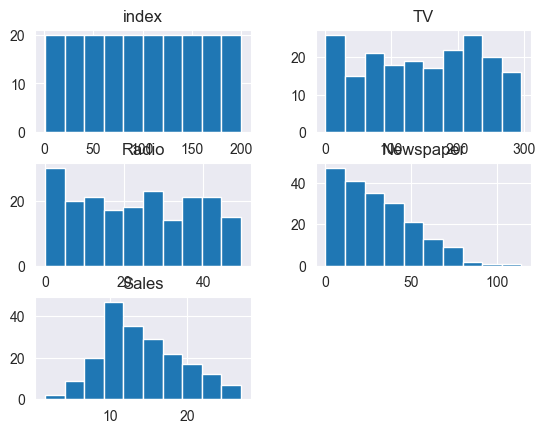

In [36]:
data.hist()

In [37]:
from matplotlib import pyplot as plt

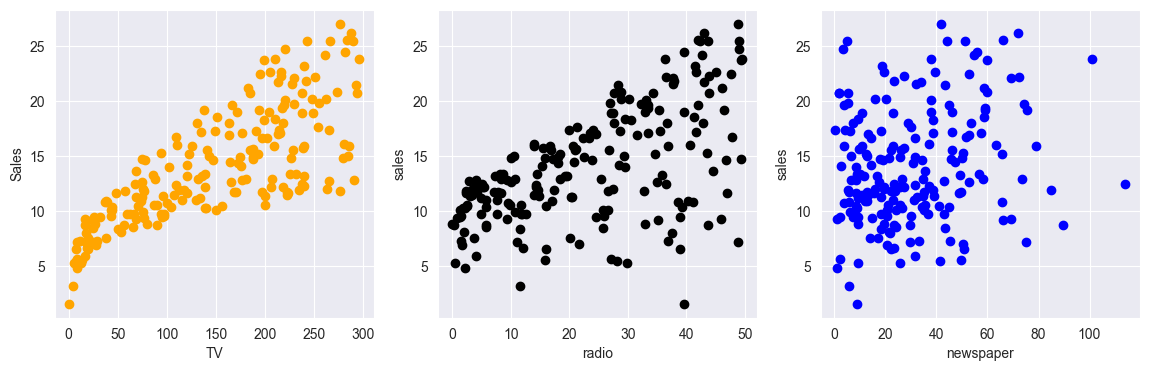

In [38]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.scatter(data['TV'], data['Sales'], color='orange')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1,3,2)
plt.scatter(data['Radio'], data['Sales'], color = 'black')
plt.xlabel('radio')
plt.ylabel('sales')

plt.subplot(1,3,3)
plt.scatter(data['Newspaper'], data['Sales'], color = 'blue')
plt.xlabel('newspaper')
plt.ylabel('sales')


plt.show()

In [39]:
def covarianza(x,y):
    cov = 0
    for i in range(len(y)):
        cov += (x[i]-np.mean(x))*(y[i]-np.mean(y))
    cov = cov/len(y)
    return cov

print("Covarianza tv: ", covarianza(data['TV'],data['Sales']))
print("Covarianza Radio",covarianza(data['Radio'],data['Sales']))
print("Covarianza Newspaper: ",covarianza(data['Newspaper'],data['Sales']))

Covarianza tv:  348.6382437499999
Covarianza Radio 44.412509999999976
Covarianza Newspaper:  25.811684999999997


In [40]:
def correlacion_Pearson(X, Y):
  return covarianza(X, Y) / math.sqrt(covarianza(X, X) * covarianza(Y, Y))

colnames = ['TV', 'Radio', 'Newspaper']

for col in colnames:
  print(correlacion_Pearson(data[col], data['Sales']))

0.7822244248616061
0.576222574571055
0.22829902637616528


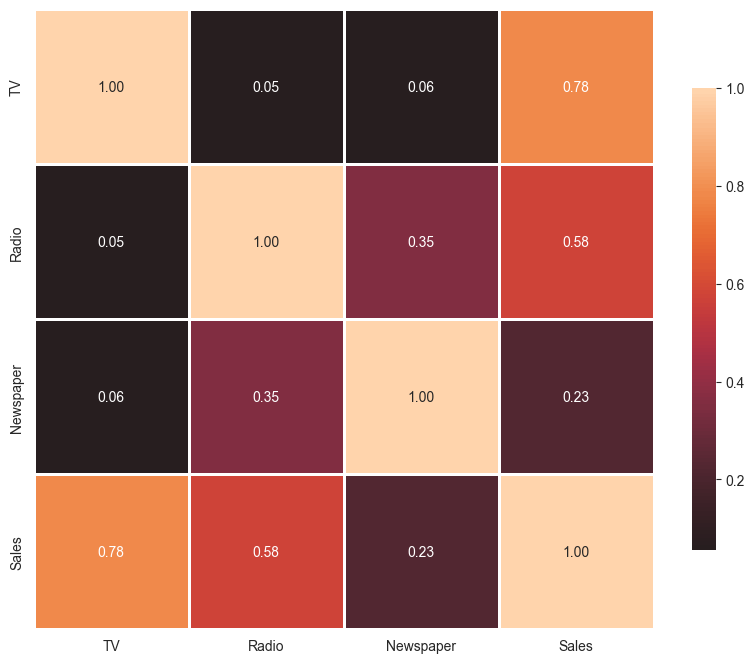

In [41]:
import seaborn as sns

def mapa_de_calor_correlacion(data):
    correlaciones = data[colnames].corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlaciones, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=1, annot=True, cbar_kws={"shrink": .60})
    plt.show();
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']

mapa_de_calor_correlacion(data)

Creando Matriz con ceros en la primera columna

In [42]:
x_matrix = data
x_matrix.head(5)

,index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [43]:
for i in range(len(x_matrix['index'])):
    x_matrix['index'][i] = 1

x_matrix.head(5)

/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_8002/4271335878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_matrix['index'][i] = 1
/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_8002/4271335878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_matrix['index'][i] = 1
/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_8002/4271335878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_matrix

,index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,1,17.2,45.9,69.3,9.3
3,1,151.5,41.3,58.5,18.5
4,1,180.8,10.8,58.4,12.9


In [44]:
def MSE(h, Y):
  return np.sum((h - Y) ** 2) / (2 * (len(h)))

def aplica_hipotesis(X, theta_0, theta_1):
  return theta_1 * X + theta_0

def cal_costo(X, Y, theta_0, theta_1):
  h = aplica_hipotesis(X, theta_0, theta_1)
  cost = MSE(h, Y)
  return h, cost

In [45]:
def plot(X, Y, theta_0, theta_1):
  plt.plot(X, Y, marker='.', linestyle='none', label='Y data')
  plt.plot(X, aplica_hipotesis(X, theta_0, theta_1), label='model line')
  plt.legend(loc="upper left")
  plt.show()

In [46]:
def linear_regression(theta_0, theta_1, column):
    X, Y = column.to_numpy(),data["Sales"].to_numpy()
    h, cost = cal_costo(X, Y, theta_0, theta_1)
    print('MSE  = ', cost)
    plot(X, Y, theta_0, theta_1)

In [47]:
def gradiente_descendente(X, Y, theta_0, theta_1, lr, epocas):
    m = len(X)
    for epoca in range(epocas):
        gradiente_0, gradiente_1 = 0 ,0
        for i in range(m):
            h_i = theta_0 + (theta_1 * X[i])
            gradiente_0 += h_i - Y[i]
            gradiente_1 += (h_i - Y[i]) * X[i]

    theta_0 -= lr * (gradiente_0 / m)
    theta_1 -= lr * (gradiente_1 / m)
    print("Theta 0: ", theta_0, " Theta 1: ", theta_1, " Época: ", epocas)
    return theta_0, theta_1


MSE  =  21.633125


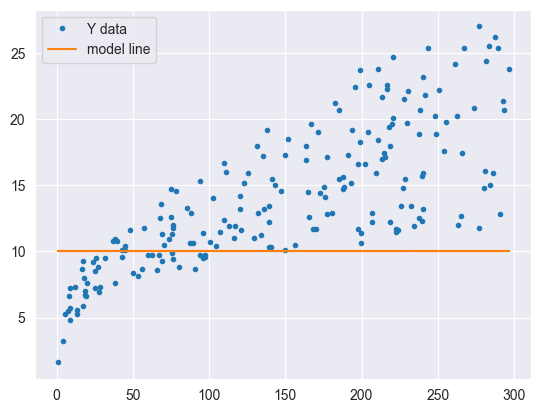

In [48]:
lr = 0.000001
epocas = 10000
theta_0 = 10
theta_1 = 0
x, y = data['TV'], data['Sales']

linear_regression(theta_0, theta_1, x)

Theta 0:  10.0000040225  Theta 1:  0.0009401166999999997  Época:  10000
MSE  =  20.762085723032932


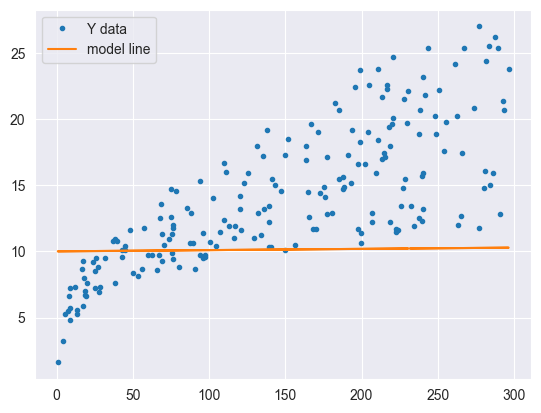

In [49]:
theta_0,theta_1 = gradiente_descendente(x, y, theta_0, theta_1, lr, epocas)

linear_regression(theta_0, theta_1, x)

MSE  =  21.503716460514426


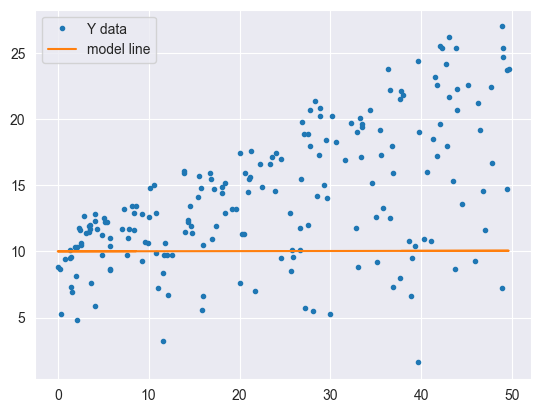

In [50]:
x = data['Radio']

linear_regression(theta_0, theta_1, x)

Theta 0:  10.000008023125103  Theta 1:  0.0010773935607236232  Época:  10000
MSE  =  21.484862697964918


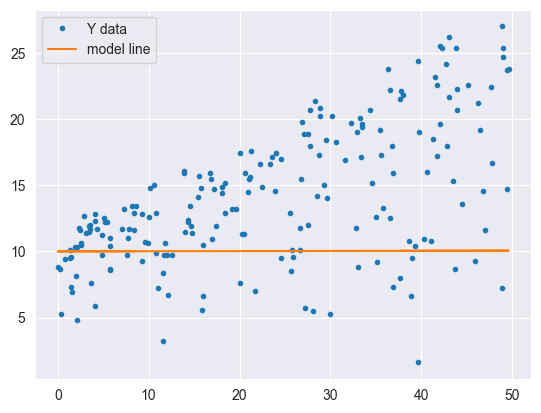

In [51]:
theta_0,theta_1 = gradiente_descendente(x, y, theta_0, theta_1, lr, epocas)

linear_regression(theta_0, theta_1, x)

MSE  =  21.47368397262551


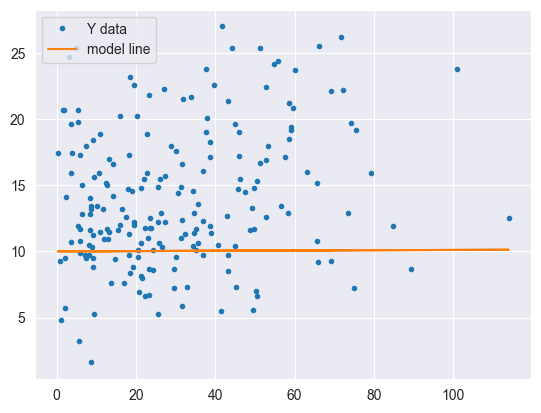

In [52]:
x = data['Newspaper']

linear_regression(theta_0, theta_1, x)

Theta 0:  10.000012012698397  Theta 1:  0.0012245942064969767  Época:  10000
MSE  =  21.45201527079725


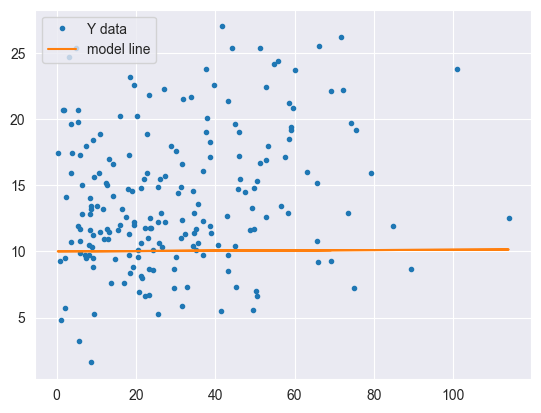

In [53]:
theta_0,theta_1 = gradiente_descendente(x, y, theta_0, theta_1, lr, epocas)

linear_regression(theta_0, theta_1, x)

In [54]:
X = data.iloc[:, 1:4].to_numpy()

print(X.shape)

(200, 3)


## Añadiendo columna de 1s a X

In [55]:
X = np.insert(X, 0, np.ones((X.shape[0])), axis = 1)
X

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

In [56]:
Y = data.iloc[:, 4].to_numpy()
Y = Y.reshape((Y.shape[0], 1))
Y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [57]:
theta = np.random.rand(X.shape[1], 1)
print(theta.shape)

(4, 1)


In [58]:
print(theta)

[[0.09923546]
 [0.95009946]
 [0.30563969]
 [0.55593589]]


In [59]:
h = X@theta

print(h.shape)

(200, 1)


In [60]:
def MSE(X, theta, Y):
  return (1 / 2 * X.shape[0]) * (X@theta - Y).T @ (X@theta - Y)

In [61]:
print(MSE(X, theta, Y))

[[5.74988111e+08]]


In [62]:
from tqdm import tqdm

def train(X, Y, theta, learning_rate = 1e-3, epochs = 100):
  for epoch in tqdm(range(epochs)):
    theta = theta - (learning_rate / X.shape[0]) * X.T @ (X@theta - Y)
  return theta

In [63]:
print(MSE(X, theta, Y))
theta = train(X, Y, theta = theta, learning_rate = 5e-5, epochs = 1000000)

print(MSE(X, theta, Y))

[[5.74988111e+08]]


100%|██████████| 1000000/1000000 [00:03<00:00, 319795.03it/s]

[[55682.5371044]]


In [64]:
print(theta)

[[ 2.93696498e+00]
 [ 4.57699007e-02]
 [ 1.88552093e-01]
 [-1.02580428e-03]]
